# Importing libraries

In [ ]:
pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

nltk.download("stopwords")
nltk.download('wordnet')
stop_words = set(stopwords.words("indonesian"))
lemmatizer= WordNetLemmatizer()

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

#Lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation
sns.set(font_scale=1.3)
nltk.download('omw-1.4')

import joblib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = '/content/drive/MyDrive/colab_bangkit/Rahayu Sentiment Analysis/'

In [ ]:
df1 = pd.read_csv(base_path + 'data/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/AngerData.csv', sep='\t')
df2 = pd.read_csv(base_path + 'data/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/FearData.csv', sep='\t')
df3 = pd.read_csv(base_path + 'data/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/JoyData.csv', sep='\t')
df4 = pd.read_csv(base_path + 'data/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/LoveData.csv', sep='\t')
df5 = pd.read_csv(base_path + 'data/Emotion-Dataset-from-Indonesian-Public-Opinion/Emotion Dataset from Indonesian Public Opinion/SadData.csv', sep='\t')

# Combine the DataFrames along the rows
dataset1 = pd.concat([df1, df2, df3, df4, df5], axis=0)
dataset1.rename(columns={'Tweet': 'Text', 'Label':'Emotion'}, inplace=True)
dataset1.head()

,Text,Emotion
0,pagi2 udah di buat emosi :),Anger
1,"kok stabilitas negara, memange 10 thn negara t...",Anger
2,dah lah emosi mulu liat emyu,Anger
3,"aib? bodoh benar! sebelum kata aib itu muncul,...",Anger
4,dih lu yg nyebelin bego,Anger


In [ ]:
dataset1['Emotion'].replace('Anger', 'anger', inplace=True)
dataset1['Emotion'].replace('Fear', 'fear', inplace=True)
dataset1['Emotion'].replace('Joy', 'happy', inplace=True)
dataset1['Emotion'].replace('Love', 'love', inplace=True)
dataset1['Emotion'].replace('Sad', 'sad', inplace=True)
dataset1.groupby('Emotion').count()

,Text
Emotion,
anger,1130
fear,911
happy,1275
love,760
sad,1003


In [ ]:
dataset2 = pd.read_csv(base_path + 'data/Indonesian-Twitter-Emotion-Dataset/Twitter_Emotion_Dataset.csv')
dataset2 = dataset2.reindex(columns=['tweet', 'label'])
dataset2.rename(columns={'tweet': 'Text', 'label':'Emotion'}, inplace=True)
dataset2.head()

,Text,Emotion
0,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu...",anger
1,"Sesama cewe lho (kayaknya), harusnya bisa lebi...",anger
2,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...,happy
3,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng...",anger
4,"Sharing pengalaman aja, kemarin jam 18.00 bata...",happy


In [ ]:
dataset2['Emotion'].replace('sadness', 'sad', inplace=True)
dataset2.groupby('Emotion').count()

,Text
Emotion,
anger,1101
fear,649
happy,1017
love,637
sad,997


In [ ]:
df_merged = pd.concat([dataset1, dataset2], axis=0)

In [ ]:
# # Split the data into train (60%), test(20%), and validation(20%) sets
df_train, df_test = train_test_split(df_merged, test_size=0.2, random_state=42)
df_train, df_val= train_test_split(df_train, test_size=0.25, random_state=42)

In [ ]:
#print first 5 rows
df_train.head()

,Text,Emotion
1248,ampe kalah awas kamu ya,anger
1270,agak lelah nih :'(,sad
2325,Saya bisa jadi berbeda kepercayaan dengan Atha...,love
49,iya bener!! aku demen banget cookies and cream,love
1025,oalahh jadi elu yang suka kentut diem diem?? m...,anger


In [ ]:
#print the shape of the data set
print(df_train.shape)

(5688, 2)


In [ ]:
#print first 5 rows
df_test.head()

,Text,Emotion
2369,Yg suka makan sirip hiu tenggelamkan tdk bu [U...,anger
395,"Kalau boleh jujur, sampe sekarang gue masih be...",anger
3324,keesokan paginya aku tanya sama bapak dan emak...,fear
1488,"Saya hanyalah ciptaan tuhan, bukan superhero a...",happy
323,iya maunya juga nikah. tapi..... lalaki na nu ...,sad


In [ ]:
#print the shape of the data set
print(df_test.shape)

(1896, 2)


In [ ]:
#print first 5 rows
df_val.head()

,Text,Emotion
3279,"singkatnya begini, terkenang ketika ada hujan ...",sad
191,sampe pagi ini masih nempel suara denise cover...,sad
2741,"[USERNAME] Lutut lemes, melongo kaya org angon...",sad
2192,JILBABER BAJU NATAL NORAK & ANJING2 KALIAN SDH...,anger
2462,Yg pernah atau sedang ngejalanin usaha pasti t...,happy


In [ ]:
#print the shape of the data set
print(df_val.shape)

(1896, 2)


# Assessing

## Train dataset

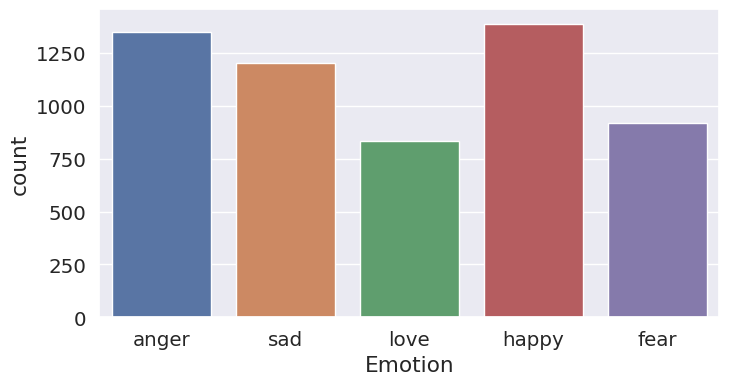

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_train);

In [ ]:
stop_words = set(stopwords.words("indonesian"))

0     656
1     623
2     548
3     519
4     482
5     452
6     442
7     382
8     379
9     292
10    231
11    176
12    130
13    104
14     83
15     53
16     23
17     20
18     17
19      8
20      7
21      2
29      1
Name: stop_words, dtype: int64

The data contains alot of stopwords (some rows contains more than 25 stopword!) so, we need to take care when we remove them as some rows may become empty

## Test dataset

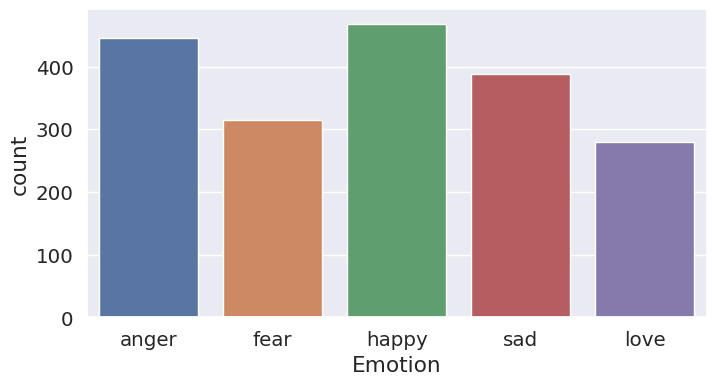

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_test);

## Validation dataset

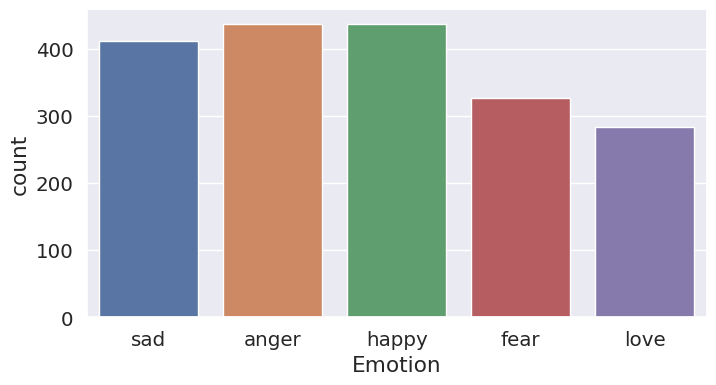

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df_val);

## Cleaning

In [ ]:
pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.7 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
def lemmatization(text):
    text= stemmer.stem(text)
    return text

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [ ]:
normalized_sentence("Nama Saya adalah Mohamed. @Tweets,  bermain 2022 Egypt_")


'nama mohamed tweets main egypt'

In [ ]:
df_train= normalize_text(df_train)
df_test= normalize_text(df_test)
df_val= normalize_text(df_val)

## Modeling

### TF-IDF


**Creating a pipline using tf-idf for words embedding and different models.**


In [ ]:
#Preprocess text
X_train = df_train['Text'].values
y_train = df_train['Emotion'].values

X_test = df_test['Text'].values
y_test = df_test['Emotion'].values

X_val = df_val['Text'].values
y_val = df_val['Emotion'].values

In [ ]:
def train_model(model, data, targets):
    """
    Train a model on the given data and targets.

    Parameters:
    model (sklearn model): The model to be trained.
    data (list of str): The input data.
    targets (list of str): The targets.

    Returns:
    Pipeline: The trained model as a Pipeline object.
    """
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

In [ ]:
def get_F1(trained_model,X,y):
    """
    Get the F1 score for the given model on the given data and targets.

    Parameters:
    trained_model (sklearn model): The trained model.
    X (list of str): The input data.
    y (list of str): The targets.

    Returns:
    array: The F1 score for each class.
    """
    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    # Return the F1 score
    return f1

**Training the Logistic Regression model on the Training set**


In [ ]:
#Train the model with the training data
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

In [ ]:
#Make a single prediction
y_pred=log_reg.predict(['Happy'])
y_pred

array(['happy'], dtype=object)

In [ ]:
#test the model with the test data
y_pred=log_reg.predict(X_test)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(log_reg,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score'])

Accuracy:  0.7399789029535865 



,F1 score
anger,0.753061
sad,0.795953
love,0.725644
happy,0.769231
fear,0.668531


In [ ]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.69      0.83      0.75       445
        fear       0.85      0.75      0.80       315
       happy       0.76      0.69      0.73       468
        love       0.71      0.84      0.77       280
         sad       0.73      0.62      0.67       388

    accuracy                           0.74      1896
   macro avg       0.75      0.75      0.74      1896
weighted avg       0.75      0.74      0.74      1896



**Training the Decision Tree model on the Training set**

In [ ]:
#Train the model with the training data
DT = train_model(DecisionTreeClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=DT.predict(X_test)

#calculate the accuracy
DT_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', DT_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(DT,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score'])

Accuracy:  0.6376582278481012 



,F1 score
anger,0.632768
sad,0.729814
love,0.607390
happy,0.702093
fear,0.548969


In [ ]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.64      0.63      0.63       445
        fear       0.71      0.75      0.73       315
       happy       0.66      0.56      0.61       468
        love       0.64      0.78      0.70       280
         sad       0.55      0.55      0.55       388

    accuracy                           0.64      1896
   macro avg       0.64      0.65      0.64      1896
weighted avg       0.64      0.64      0.64      1896



**Training the Support Vector Machine model on the Training set**


In [ ]:
#Train the model with the training data
SVM = train_model(SVC(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=SVM.predict(X_test)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(SVM,X_test,y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score'])


Accuracy:  0.7331223628691983 



,F1 score
anger,0.740964
sad,0.780656
love,0.727473
happy,0.750831
fear,0.675177


In [ ]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.67      0.83      0.74       445
        fear       0.86      0.72      0.78       315
       happy       0.75      0.71      0.73       468
        love       0.70      0.81      0.75       280
         sad       0.75      0.61      0.68       388

    accuracy                           0.73      1896
   macro avg       0.75      0.73      0.74      1896
weighted avg       0.74      0.73      0.73      1896



**Training the Random Forest model on the Training set**

In [ ]:
#Train the model with the training data
RF = train_model(RandomForestClassifier(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=RF.predict(X_test)

#calculate the accuracy
RF_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', RF_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(RF, X_test, y_test)
pd.DataFrame(f1_Score, index=df_train.Emotion.unique(), columns=['F1 score'])

Accuracy:  0.7172995780590717 



,F1 score
anger,0.719682
sad,0.796721
love,0.695349
happy,0.750388
fear,0.637854


In [ ]:
##Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       anger       0.65      0.81      0.72       445
        fear       0.82      0.77      0.80       315
       happy       0.76      0.64      0.70       468
        love       0.66      0.86      0.75       280
         sad       0.76      0.55      0.64       388

    accuracy                           0.72      1896
   macro avg       0.73      0.73      0.72      1896
weighted avg       0.73      0.72      0.71      1896



## Results

In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree','Support Vector Machine','Random Forest'],
    'Accuracy': [log_reg_accuracy.round(2), DT_accuracy.round(2), SVM_accuracy.round(2), RF_accuracy.round(2)]})

models.sort_values(by='Accuracy', ascending=False).reset_index().drop(['index'], axis=1)

,Model,Accuracy
0,Logistic Regression,0.74
1,Support Vector Machine,0.73
2,Random Forest,0.72
3,Decision Tree,0.64


# Better way?
Word embedding using this glove and use a sequence model

## Text Preprocessing

In [ ]:
#Splitting the text from the labels
X_train = df_train['Text']
y_train = df_train['Emotion']

X_test = df_test['Text']
y_test = df_test['Emotion']

X_val = df_val['Text']
y_val = df_val['Emotion']

In [ ]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [ ]:
#print the labels after encoding
print(set(y_train))

{0, 1, 2, 3, 4}


In [ ]:
#Convert the class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [ ]:
print(y_train)

[[1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


## Tokenizing

In [ ]:
# Tokenize words
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

In [ ]:
#print the index of a single word
tokenizer.word_index['marah']

43

In [ ]:
#converting a single sentence to list of indexes
tokenizer.texts_to_sequences(X_train[0].split())

[[437], [387], [1470], [5]]

In [ ]:
#convert the list of indexes into a matrix of ones and zeros (BOW)
tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#the sentence contains three words and the size of the vocabulary is 14325
tokenizer.texts_to_matrix(X_train[0].split()).shape

(4, 16897)

In [ ]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

## Padding

The vectors we obtain are generally not of equal lengths

For that, we might need to pad the sequences to max len.

In [ ]:
df_test.shape

(1896, 2)

In [ ]:
maxlen = max([len(t) for t in df_train['Text']])
maxlen

610

In [ ]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 16897


In [ ]:
#before
sequences_train[0]

[437, 387, 1470, 5]

In [ ]:
#after
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Word Embedding

In [ ]:
# Read GloVE embeddings
# I use pretrained embedding glove 50 dim which trained on wikipedia indonesia,
# you can download it here, https://drive.google.com/file/d/1jgnvIEp8rE3dh68lZXBHfyxzmeky9z6w/view?usp=sharing

path_to_glove_file = base_path + 'pretrained-embedding/indo/glove_50dim_wiki.id.case.text.txt'
num_tokens = vocabSize
embedding_dim = 50 #latent factors or features
hits = 0
misses = 0
embeddings_index = {}

I will intialize an embedding matrix with all zero values and then looping through the vocabulary (as defined by the tokenizer object) to assign word vectors to the corresponding rows of the embedding matrix. The word_index attribute of the tokenizer object is a dictionary that maps words to their indices in the vocabulary.

The embedding matrix will have a size of num_tokens rows and embedding_dim columns, where num_tokens is the size of the vocabulary and embedding_dim is the dimensionality of the word vectors.

For each word in the vocabulary, the code looks up the corresponding word vector in the embeddings_index dictionary and assigns it to the corresponding row of the embedding matrix. If the word is not found in the embeddings_index dictionary (i.e., if embedding_vector is None), the code increments the misses counter and the row of the embedding matrix remains all-zeros. If the word is found in the embeddings_index dictionary, the code increments the hits counter and assigns the word vector to the corresponding row of the embedding matrix. Finally, the code prints out the number of words that were converted (hits) and the number that were not found in the embeddings_index dictionary (misses).

In [ ]:
# Read word vectors
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Found 370013 word vectors.
Converted 8562 words (8334 misses)


## Modeling

**The model consists of several layers:**

1. An Embedding layer that takes in integer-encoded text and looks up the embedding vector for each word in the input. The input length is set to the length of the input sequences, and the weights are initialized with an embedding matrix that has been pre-trained on a large dataset. The embedding layer is not trainable, meaning that the weights of this layer will not be updated during training.

2. Three Bidirectional layers, each of which applies a forward and backward LSTM to the input. LSTMs are a type of recurrent neural network that are able to capture long-term dependencies in sequential data. The dropout and recurrent dropout arguments specify the dropout rate to apply to the inputs and recurrent inputs of the LSTMs, respectively. The return_sequences argument specifies whether the LSTM should return the full sequences of outputs or just the last output of each sequence.

3. A Dense layer that applies a linear transformation to the input to produce the output. The output has 6 units and uses the 'softmax' activation function, which means that it will output a probability distribution over the 6 classes.

In [ ]:
# Build neural network architecture

adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 50, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 229, 50)           844850    
                                                                 
 bidirectional (Bidirectiona  (None, 229, 512)         628736    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 229, 256)         656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 5)                 1285      
                                                      

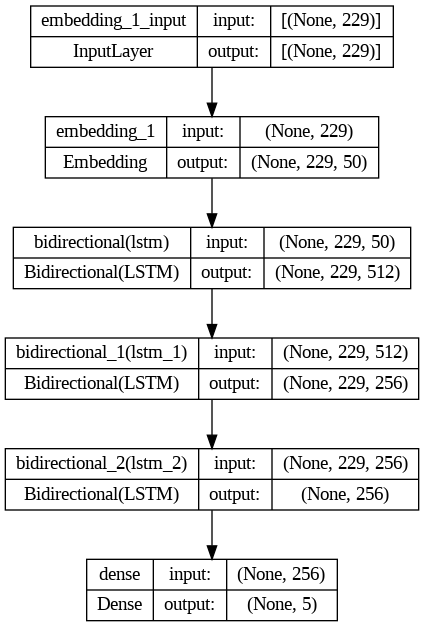

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [ ]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callback]
                   )

Epoch 1/30
22/22 [==============================] - 234s 9s/step - loss: 1.4781 - accuracy: 0.3591 - val_loss: 1.3211 - val_accuracy: 0.4611
Epoch 2/30
22/22 [==============================] - 158s 7s/step - loss: 1.2631 - accuracy: 0.4854 - val_loss: 1.1820 - val_accuracy: 0.5236
Epoch 3/30
22/22 [==============================] - 154s 7s/step - loss: 1.1265 - accuracy: 0.5597 - val_loss: 1.0542 - val_accuracy: 0.6008
Epoch 4/30
22/22 [==============================] - 143s 7s/step - loss: 0.9978 - accuracy: 0.6183 - val_loss: 0.9906 - val_accuracy: 0.6273
Epoch 5/30
22/22 [==============================] - 144s 6s/step - loss: 0.9075 - accuracy: 0.6641 - val_loss: 0.9250 - val_accuracy: 0.6575
Epoch 6/30
22/22 [==============================] - 144s 7s/step - loss: 0.8521 - accuracy: 0.6899 - val_loss: 0.9266 - val_accuracy: 0.6623
Epoch 7/30
22/22 [==============================] - 145s 7s/step - loss: 0.7942 - accuracy: 0.7130 - val_loss: 0.9589 - val_accuracy: 0.6506
Epoch 8/30
22

In [ ]:
#print the overall loss and accuracy
model.evaluate(X_val, y_val, verbose=1)

60/60 [==============================] - 25s 419ms/step - loss: 0.8922 - accuracy: 0.6808


[0.8921598792076111, 0.6807835102081299]

In [ ]:
#print the overall loss and accuracy
model.evaluate(X_test, y_test, verbose=1)

60/60 [==============================] - 25s 414ms/step - loss: 0.8927 - accuracy: 0.6851


[0.8927441239356995, 0.6851266026496887]

In [ ]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df_test['Emotion']), y_pred))

60/60 [==============================] - 27s 427ms/step
              precision    recall  f1-score   support

           0       0.66      0.76      0.70       445
           1       0.80      0.72      0.76       315
           2       0.66      0.68      0.67       468
           3       0.67      0.74      0.70       280
           4       0.68      0.54      0.60       388

    accuracy                           0.69      1896
   macro avg       0.69      0.69      0.69      1896
weighted avg       0.69      0.69      0.68      1896



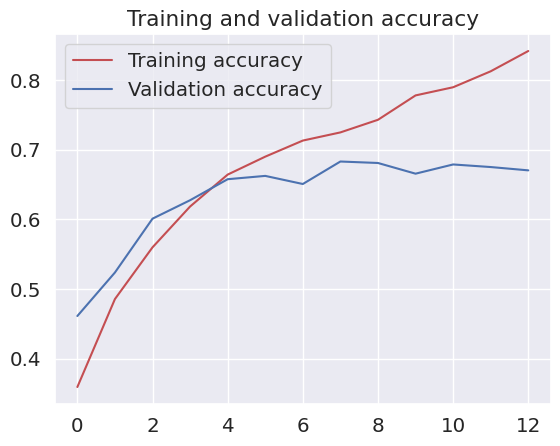

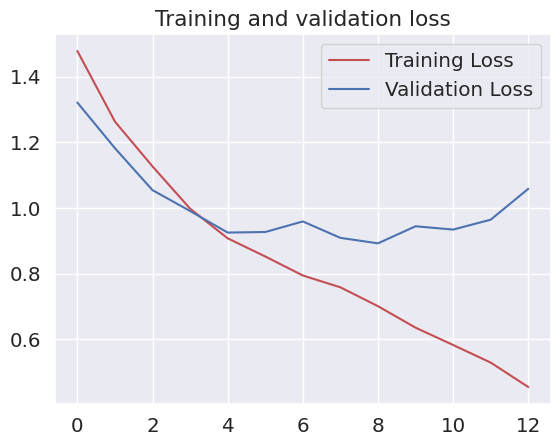

In [ ]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Classify custom sample

sentences = ["Dia sedang tersedu bahagia setelah diterima perguruan tinggi terbesar",
             "pendapatmu Pada hal ini buat ku jengkel, apa maksud mu, ga masuk akal",
             "aku ga bisa melakukannya, pekerjaan ini terlalu berat",
             "wah kamu kok bisa ngerjain tugas itu, keren sekali"
            ]
for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

Dia sedang tersedu bahagia setelah diterima perguruan tinggi terbesar
1/1 [==============================] - 0s 378ms/step
happy : 0.9700381755828857


pendapatmu Pada hal ini buat ku jengkel, apa maksud mu, ga masuk akal
1/1 [==============================] - 0s 391ms/step
anger : 0.9273542165756226


aku ga bisa melakukannya, pekerjaan ini terlalu berat
1/1 [==============================] - 0s 372ms/step
anger : 0.7325082421302795


wah kamu kok bisa ngerjain tugas itu, keren sekali
1/1 [==============================] - 0s 377ms/step
anger : 0.43567800521850586




# Save Model

In [ ]:
# model.save(base_path + 'Bidirectional LSTM English EMO.h5')

In [ ]:
joblib.dump(model, 'Bidirectional LSTM Indo EMO.pkl')

['Bidirectional LSTM Indo EMO.pkl']

In [ ]:
loaded_model = joblib.load('Bidirectional LSTM Indo EMO.pkl')

In [ ]:
sentence= 'Aku merasa senang sekali hari ini, boss ku baik kasih aku jajan chiki'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(loaded_model.predict(sentence), axis=-1))[0]
proba =  np.max(loaded_model.predict(sentence))
print(f"{result} : {proba}\n\n")

Aku merasa senang sekali hari ini, boss ku baik kasih aku jajan chiki
1/1 [==============================] - 0s 394ms/step
happy : 0.5661760568618774


